# Training a Classifier: Assignment 5

During this assignment, the collective results of all your HITs as a class will be used as datasets to train image classifiers. We will be using [fastai](https://docs.fast.ai/), which provides straightforward methods for deep learning. Deep learning utilizes multiple layers of neural networks in order to extract and transform data. Applications of deep learning can be found all around you, including speech recognition, autonomous driving, and board games.

The authors of fastai have a series of tutorials on Deep Learning for Coders. You should watch [Lesson 1](https://course.fast.ai/videos/?lesson=1) for an introduction to deep learning. Note that the code that needs to be written for this Colab notebook assignment will adapt the original code found in the video, and so the video may be helpful.

Below are the instructions on what code you need to write for this assignment. Please follow the instructions and post questions on Piazza for anything that needs to be clarified. Please also save a copy of this Colab file to your personal Google Drive and work on that copy. You will submit a link to your Colab notebook on Gradescope.

# Install dependencies

You only need to run this once to set the notebook up. Make sure you select Runtime > Change Runtime Type > GPU to get a GPU on Google Colab.

In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
import sklearn
import os

#hide
from fastbook import *

#hide
! curl https://nets213-hw5.s3.amazonaws.com/mega_results_cleaned_validated.csv -o results.csv 
! curl https://nets213-hw5.s3.amazonaws.com/weddings-indian-languages.zip -o  weddings-indian-languages.zip
! curl https://nets213-hw5.s3.amazonaws.com/weddings%2Brandom-european-language.zip -o weddings-european-language.zip
! unzip -o weddings-indian-languages.zip 1>/dev/null
! unzip -o weddings-european-language.zip 1>/dev/null
! rm -rf weddings-european-language 1>/dev/null 2>/dev/null || true
os.rename("weddings+random-european-language","weddings-european-language") # renames the folder for convenience later in the assignment

# Load all the compiled HITs results

We've provided **mega_results_cleaned_validated.csv**, which is a compilation of all student HIT results from this year's class and last year's class. Read it in and for each image, calculate the count of how many Turkers voted yes or no for the image. Note that in order to improve the classifiers' performances, several hundred negative Western images were added to augment the Western dataset of images. These additional Western images were all labeled to not depict weddings.

As you were assigned to randomly shuffle your images, the actual number of votes that each image received isn't uniform. Thus, in the following cells, we will classify an image as True (the image depicts a wedding) if the majority of its votes are yes. For example, if an image received a total of seven votes, if at least four workers voted yes, then we will classify the image as True. If an image received a total of eight votes, if at least five workers voted yes, then we will classify the image as True.

In [ ]:
import pandas as pd 
from collections import Counter

df = pd.read_csv("results.csv") # reads a .csv file into a DataFrame
yes_votes = Counter() # holds the number of "yes" votes each image receives
total_votes = Counter() # holds the number of total votes each image receives

for _, row in df.iterrows():
  true_images = row['Answer.selected'].split('|') # splits the string into a list with the specified '|' separator
  for i in range(1, 13):
    url = row["Input.image" + str(i)] 
    if type(url) is not str: continue # this line skips bad entries in CSV

    total_votes[url] += 1 # Add 1 to total_votes when the url received a vote (again, we are try to get the total votes each image receives)

    ##### START CODE HERE: Add 1 to yes_votes when the url has a vote (in other words, when the url is in true_image) #####
    
    ##### END CODE HERE #####

# Train an image classifier to classify weddings

Instead of classifying images of cats vs. dogs like in the fastai lesson, we're going to be classifying whether a photo contains a wedding or not. We'll classify an image as a wedding if a majority of the workers said the image represented a wedding.

We will train two classifiers. The first classifier will be trained on only Western images, and then assessed on both Western and NonWestern images. The second classifier will be trained on both Western and NonWestern images, and then assessed on both Western and NonWestern images.

In [ ]:
from fastai.vision.all import *

def get_path_from_url(url):
  return url.replace('https://s3.amazonaws.com/nets213-hw5/', '')

image_urls = list(total_votes.keys()) # remote URLs to the images
paths = [get_path_from_url(url) for url in image_urls] # local paths to the image files in the Google Colab files

##### START CODE HERE: Write get_label() to return True if the image has a majority of "yes" votes, and False otherwise #####
def get_label(url): 
  pass
##### END CODE HERE #####

##### START CODE HERE: Run get_label() on image_urls to create a list called "labels" #####
labels = None
##### END CODE HERE #####

# The code below updates the image URLs of the additional negative Western images that we added to improve training
for index in range(0, len(paths)):
  if "random-european-language" in paths[index]:
    sections = paths[index].split('/')
    revised_path = "weddings-european-language/" + ('/').join(sections[1:])
    paths[index] = revised_path

We have the paths and labels from our compiled **mega_results_cleaned.csv**. As stated before, we wish to assess our two classifiers firstly on Western images and then secondly on NonWestern images. Thus, we need to separate our paths/labels into two separate sets – the set of Western paths/labels and the set of NonWestern paths/labels.

For assessment purposes, we wish to create a test set of Western images and a test set of NonWestern images. These images should not be used to train the classifiers. Thus, we need to split the Western set of images into a training set and a test set, and do the same for the NonWestern set of images.

Note that some image URLs that were provided in the MTurk HITs are not valid URLs. In other words, there are several URLs in **paths** that we should ignore. The following code will also do this filtering.

In [ ]:
# Western set of images
paths_Western = []
labels_Western = []

# NonWestern set of images
paths_NonWestern = []
labels_NonWestern = []

##### START CODE HERE: Index through the paths and labels and add to either the Western set or NonWestern set – if a path doesn't contain either "indian-languages" or "european-language", ignore it #####

##### END CODE HERE #####

##### START CODE HERE: Split your Western dataset into a training set (80%) and test set (20%), and do the same with your NonWestern dataset – use sklearn.model_selection.train_test_split() with the stratify parameter equal to your labels #####
paths_Western_train, paths_Western_test, labels_Western_train, labels_Western_test = None
paths_NonWestern_train, paths_NonWestern_test, labels_NonWestern_train, labels_NonWestern_test = None
##### END CODE HERE #####

We will train our first classifier. Again, this first classifier will be trained solely on our Western training set, whose paths and labels are stored in **paths_Western_train** and **labels_Western_train**.

We will now specify the structure of our dataset and then create and train our model. If the given parameter values are used, the training time should be about a minute and the error rate should be around 10-15%. Try to experiment around with different parameters to further tune the model! Examples of potential improvements are data augmentations, additional epochs, and batch sizes. 

Reference the [documentation](https://docs.fast.ai/vision.data.html#ImageDataLoaders) of ImageDataLoaders to determine the appropriate method to use for the first line.

In [ ]:
##### START CODE HERE: Specify what type of dataset we have and how it's structured with ImageDataLoaders – use a validation percentage of 20%, seed of 42, and item transformation of Resize(224) #####
dls_Western = None
##### END CODE HERE #####

##### START CODE HERE: Create a convolutional neural network called "classifier_Western" with cnn_learner() – use an architecture of resnet34, metric of error_rate, and pretrained of True #####
classifier_Western = None
##### END CODE HERE #####

##### START CODE HERE: Fit the model with fine_tune() – use an epoch of 5

##### END CODE HERE #####

Try using a sample wedding image found online with this classifier in order to see if it was successfully trained.

In [ ]:
# Click on the gray "Upload" button in order to upload your sample wedding image
uploader = widgets.FileUpload()
uploader

In [ ]:
# The model will predict whether or not your uploaded image is that of a wedding
img = PILImage.create(uploader.data[0])
is_wedding,_,probs = classifier_Western.predict(img)
print(f"Is this an image of a wedding?: {is_wedding}.")
print(f"Probability it's a wedding: {probs[1].item():.6f}")

We will now train our second classifier. Again, this second classifier will be trained on both our Western training set and NonWestern training set. The Western training set's paths and labels are stored in **paths_Western_train** and **labels_Western_train**. The NonWestern training set's paths and labels are stored in **paths_NonWestern_train** and **labels_NonWestern_train**. We will combine these training sets into **paths_Both_train** and **labels_Both_train**.

In [ ]:
##### START CODE HERE: Combine the Western training set and the NonWestern training set #####
paths_Both_train = None
labels_Both_train = None
##### END CODE HERE #####

##### START CODE HERE: Specify what type of dataset we have and how it's structured with ImageDataLoaders – use a validation percentage of 20%, seed of 42, and item transformation of Resize(224) #####
dls_Both = None
##### END CODE HERE #####

##### START CODE HERE: Create a convolutional neural network called "classifier_Both" with cnn_learner() – use an architecture of resnet34, metric of error_rate, and pretrained of True #####
classifier_Both = None
##### END CODE HERE #####

##### START CODE HERE: Fit the model with fine_tune() – use an epoch of 5

##### END CODE HERE #####

Try using a sample wedding image found online with this classifier in order to see if it was successfully trained.

In [ ]:
# Click on the gray "Upload" button in order to upload your sample wedding image
uploader = widgets.FileUpload()
uploader

In [ ]:
# The model will predict whether or not your uploaded image is that of a wedding
img = PILImage.create(uploader.data[0])
is_wedding,_,probs = classifier_Both.predict(img)
print(f"Is this an image of a wedding?: {is_wedding}.")
print(f"Probability it's a wedding: {probs[1].item():.6f}")

# Calculate evaluation metrics for our two classifiers

We will now calculate several evaluation metrics to assess our two classifiers. Several metrics include precision, recall, and F1-Score. These three metrics can be used to assess how good our classifiers are. An overview can be found [here](https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec). 

A confusion matrix can help visualize the components used in calculating these metrics:

<figure align="center">
<img src="https://miro.medium.com/max/800/1*fxiTNIgOyvAombPJx5KGeA.png" width="350" />
</figure>

*   Precision: The ratio of what our model predicted correctly to what our model predicted
*   Recall: Ratio of what our model predicted correctly to what the actual labels are
*   F1-Score: Harmonic mean of precision and recall

<figure align="center">
<img src="https://miro.medium.com/max/1068/1*EXa-_699fntpUoRjZeqAFQ.jpeg" />
</figure>


In order to have a baseline for comparison, we created a classifier pretrained on ImageNet and obtained the following metrics:

*   NonWestern Precision from ImageNet classifier: 0.658008658008568
*   NonWestern Recall from ImageNet classifier: 0.18225419664268586
*   NonWestern F1-Score from ImageNet classifier: 0.28544600938967135
*   Western Precision from ImageNet classifier: 0.7463414634146341
*   Western Recall from ImageNet classifier: 0.504950495049505
*   Western F1-Score from ImageNet classifier: 0.6023622047244095

Notice that our ImageNet classifier performs worse on the NonWestern images than on Western images, as seen in the difference in F1-Scores. This result could have been anticipated. [Google researchers](https://research.google/pubs/pub46553/) found that ImageNet “appear[s] to exhibit an observable amerocentric and eurocentric representation bias,” as demonstrated by the distribution of geographically identifiable images in the datasets, with 2/3 of the images from the Western world. 

<figure align="center">
<img src="http://crowdsourcing-class.org/images/imagenet_pie_chart.jpg" />
</figure>

We will calculate these metrics for our two classifiers as well. We will have our classifiers predict whether or not these images depict a wedding in order to determine our True Positive, True Negative, False Positive, and False Negative values and ultimately calculate the F1-Scores.

We will use the predictions of your classifiers on **paths_Western_test** with **labels_Western_test** to assess the TP, TN, FP, and FN values on Western images. We will use the predictions of your classifiers on **paths_NonWestern_test** with **labels_NonWestern_test** to assess the TP, TN, FP, and FN values on NonWestern images.

# Calculate evaluation metrics for your first classifier trained only on Western images

Firstly, calculate the precision, recall, and F1-score for your first classifier trained only on Western images and assessed with Western images.


In [ ]:
predictions_Western_Western = []

##### START CODE HERE: Create a list called predictions_Western_Western that stores all predictions from your classifier_Western for the Western images in paths_Western_test #####
predictions_Western_Western = None
##### END CODE HERE #####

In [ ]:
##### START CODE HERE: Calculate the number of True Positives, True Negatives, False Positives, and False Negatives for your classifier_Western on the Western images #####
TP_Western_Western = None
TN_Western_Western = None
FP_Western_Western = None
FN_Western_Western = None
##### END CODE HERE #####

##### START CODE HERE: Calculate precision, recall, and F1-score for your classifier_Western on the Western images #####
precision_Western_Western = None
recall_Western_Western = None
f1_score_Western_Western = None
##### END CODE HERE #####

# Display your confusion matrix, precision, recall, and F1-score for your classifier_Western on the Western images
confusion_matrix_data = [(TP_Western_Western, FP_Western_Western) , (FN_Western_Western, TN_Western_Western)]
confusion_matrix = pd.DataFrame(confusion_matrix_data, columns = ['Actual Wedding' , 'Actual Non-Wedding'], index=['Predicted Wedding', 'Predicted Non-Wedding'])
print("Confusion Matrix:")
display(confusion_matrix)
print("Western Precision from your first classifier trained only on Western images: " + str(precision_Western_Western))
print("Western Recall from your first classifier trained only on Western images: " + str(recall_Western_Western))
print("Western F1-Score from your first classifier trained only on Western images: " + str(f1_score_Western_Western))

Secondly, calculate the precision, recall, and F1-score for your first classifier trained only on Western images and assessed with NonWestern images.


In [ ]:
predictions_Western_NonWestern = []

##### START CODE HERE: Create a list called predictions_Western_NonWestern that stores all predictions for the NonWestern images in paths_NonWestern_test #####
predictions_Western_NonWestern = None
##### END CODE HERE #####

In [ ]:
##### START CODE HERE: Calculate the number of True Positives, True Negatives, False Positives, and False Negatives for your classifier_Western on the NonWestern images #####
TP_Western_NonWestern = None
TN_Western_NonWestern = None
FP_Western_NonWestern = None
FN_Western_NonWestern = None
##### END CODE HERE #####

##### START CODE HERE: Calculate precision, recall, and F1-score for your classifier_Western on the NonWestern images #####
precision_Western_NonWestern = None
recall_Western_NonWestern = None
f1_score_Western_NonWestern = None
##### END CODE HERE #####

# Display your confusion matrix, precision, recall, and F1-score for your classifier_Western on the NonWestern images
confusion_matrix_data = [(TP_Western_NonWestern, FP_Western_NonWestern) , (FN_Western_NonWestern, TN_Western_NonWestern)]
confusion_matrix = pd.DataFrame(confusion_matrix_data, columns = ['Actual Wedding' , 'Actual Non-Wedding'], index=['Predicted Wedding', 'Predicted Non-Wedding'])
print("Confusion Matrix:")
display(confusion_matrix)
print("NonWestern Precision from your first classifier trained only on Western images: " + str(precision_Western_NonWestern))
print("NonWestern Recall from your first classifier trained only on Western images: " + str(recall_Western_NonWestern))
print("NonWestern F1-Score from your first classifier trained only on Western images: " + str(f1_score_Western_NonWestern))

# Visual Error Analysis on your first classifier

Let's display some of the images your first classifier is predicting "non-wedding" for when the actual image is a non-Western "wedding". These are some of images the classifier failed on (false negatives). Next, we'll calculate evaluation metrics on your second classifier that was trained on both Western and non-Western images and see if it improved the performance!

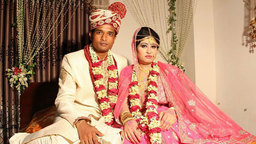

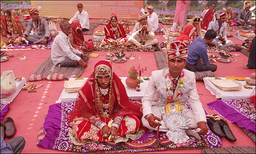

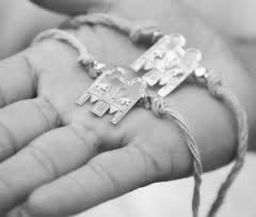

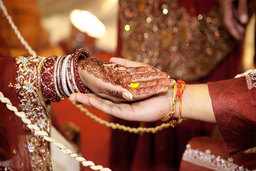

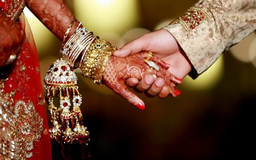

In [ ]:
import IPython
import random

classifier_Western_false_negative_images = []

##### START CODE HERE: Store all instances of False Negative images from predictions_Western_NonWestern on paths_NonWestern_test #####

##### END CODE HERE #####

# The below code displays five images that were False Negatives – images that the classifier_Western predicted to not be weddings but were actually weddings
random.shuffle(classifier_Western_false_negative_images)
display(IPython.display.Image(classifier_Western_false_negative_images[0]))
display(IPython.display.Image(classifier_Western_false_negative_images[1]))
display(IPython.display.Image(classifier_Western_false_negative_images[2]))
display(IPython.display.Image(classifier_Western_false_negative_images[3]))
display(IPython.display.Image(classifier_Western_false_negative_images[4]))

# Calculate evaluation metrics for your second classifier trained on both Western and NonWestern images

Firstly, calculate the precision, recall, and F1-score for your second classifier trained on both Western and NonWestern images and assessed with Western images.


In [ ]:
predictions_Both_Western = []

##### START CODE HERE: Create a list called predictions_Both_Western that stores all predictions for the Western images in paths_Western_test #####
predictions_Both_Western = None
##### END CODE HERE #####

In [ ]:
##### START CODE HERE: Calculate the number of True Positives, True Negatives, False Positives, and False Negatives for your classifier_Both on the Western images #####
TP_Both_Western = None
TN_Both_Western = None
FP_Both_Western = None
FN_Both_Western = None
##### END CODE HERE #####

##### START CODE HERE: Calculate precision, recall, and F1-score for your classifier_Both on the Western images #####
precision_Both_Western = None
recall_Both_Western = None
f1_score_Both_Western = None
##### END CODE HERE #####

# Display your confusion matrix, precision, recall, and F1-score for your classifier_Both on the Western images
confusion_matrix_data = [(TP_Both_Western, FP_Both_Western) , (FN_Both_Western, TN_Both_Western)]
confusion_matrix = pd.DataFrame(confusion_matrix_data, columns = ['Actual Wedding' , 'Actual Non-Wedding'], index=['Predicted Wedding', 'Predicted Non-Wedding'])
print("Confusion Matrix:")
display(confusion_matrix)
print("Western Precision from your second classifier trained on both Western and NonWestern images: " + str(precision_Both_Western))
print("Western Recall from your second classifier trained on both Western and NonWestern images: " + str(recall_Both_Western))
print("Western F1-Score from your second classifier trained on both Western and NonWestern images: " + str(f1_score_Both_Western))

Secondly, calculate the precision, recall, and F1-score for your second classifier trained on both Western and NonWestern images and assessed with NonWestern images.


In [ ]:
predictions_Both_NonWestern = []

##### START CODE HERE: Create a list called predictions_Both_NonWestern that stores all predictions for the NonWestern images in paths_NonWestern_test #####
predictions_Both_NonWestern = None
##### END CODE HERE #####

In [ ]:
##### START CODE HERE: Calculate the number of True Positives, True Negatives, False Positives, and False Negatives for your classifier_Both on the NonWestern images #####
TP_Both_NonWestern = None
TN_Both_NonWestern = None
FP_Both_NonWestern = None
FN_Both_NonWestern = None
##### END CODE HERE #####

##### START CODE HERE: Calculate precision, recall, and F1-score for your classifier_Both on the NonWestern images #####
precision_Both_NonWestern = None
recall_Both_NonWestern = None
f1_score_Both_NonWestern = None
##### END CODE HERE #####

# Display your confusion matrix, precision, recall, and F1-score for your classifier_Both on the NonWestern images
confusion_matrix_data = [(TP_Both_NonWestern, FP_Both_NonWestern) , (FN_Both_NonWestern, TN_Both_NonWestern)]
confusion_matrix = pd.DataFrame(confusion_matrix_data, columns = ['Actual Wedding' , 'Actual Non-Wedding'], index=['Predicted Wedding', 'Predicted Non-Wedding'])
print("Confusion Matrix:")
display(confusion_matrix)
print("NonWestern Precision from your second classifier trained on both Western and NonWestern images: " + str(precision_Both_NonWestern))
print("NonWestern Recall from your second classifier trained on both Western and NonWestern images: " + str(recall_Both_NonWestern))
print("NonWestern F1-Score from your second classifier trained on both Western and NonWestern images: " + str(f1_score_Both_NonWestern))

You have calculated the following:
*   Precision, Recall, F1-Score for your first classifier trained on only Western images and assessed on Western images
*   Precision, Recall, F1-Score for your first classifier trained on only Western images and assessed on NonWestern images
*   Precision, Recall, F1-Score for your second classifier trained on both Western and NonWestern images and assessed on Western images
*   Precision, Recall, F1-Score for your second classifier trained on both Western and NonWestern images and assessed on NonWestern images

Compare these metrics together. Do you see any significant differences? What do you think caused these differences?


# Visual validation on your second classifier

Now we'll check and see if the images of NonWestern weddings that were incorrectly predicted as "not-wedding" by your first classifier are correctly classified by your second classifier as "wedding". Recall that the first classifier was trained only on Western images and the second classifier was trained on both Western and NonWestern images.

In [ ]:
print("------------------------------------------------------------------")
display(IPython.display.Image(classifier_Western_false_negative_images[0]))
print("First Classifier Predicted:", "not-wedding")
print("Second Classifier Predicted:", "wedding" if 'True' == str(classifier_Both.predict(classifier_Western_false_negative_images[0])[0]) else "not-wedding")
print("------------------------------------------------------------------")
display(IPython.display.Image(classifier_Western_false_negative_images[1]))
print("First Classifier Predicted:", "not-wedding")
print("Second Classifier Predicted:", "wedding" if 'True' == str(classifier_Both.predict(classifier_Western_false_negative_images[1])[0]) else "not-wedding")
print("------------------------------------------------------------------")
display(IPython.display.Image(classifier_Western_false_negative_images[2]))
print("First Classifier Predicted:", "not-wedding")
print("Second Classifier Predicted:", "wedding" if 'True' == str(classifier_Both.predict(classifier_Western_false_negative_images[2])[0]) else "not-wedding")
print("------------------------------------------------------------------")
display(IPython.display.Image(classifier_Western_false_negative_images[3]))
print("First Classifier Predicted:", "not-wedding")
print("Second Classifier Predicted:", "wedding" if 'True' == str(classifier_Both.predict(classifier_Western_false_negative_images[3])[0]) else "not-wedding")
print("------------------------------------------------------------------")
display(IPython.display.Image(classifier_Western_false_negative_images[4]))
print("------------------------------------------------------------------")
print("First Classifier Predicted:", "not-wedding")
print("Second Classifier Predicted:", "wedding" if 'True' == str(classifier_Both.predict(classifier_Western_false_negative_images[4])[0]) else "not-wedding")

# Conclusion

Congratulations on successfully training your image classifiers! Upload this Colab file to Gradescope before the deadline.